In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter), will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 


import datetime


from sklearn.model_selection import train_test_split 


from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [3]:
train =pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
train2 =pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

test_final=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')


* Latitude range: [0:34] ( General range is -90 to 90 )
* Longitude range: [-118: 0] (General range is 180 to 180)



In [4]:
train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [5]:
# train=train[['Latitude','Longitude','Victim_Age','','Area_ID','']]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

# **Categorical Columns **

# Location

In [7]:
print(train['Location'].unique())


print('--------------------------------')

print('Number of unqiue location : '  , len(train['Location'].unique()))


print('--------------------------------')


train.loc[: , 'Location']=train['Location'].apply( lambda x : ' '.join(x.split()))

print(train['Location'].unique())



print('Number of unqiue location : '  , len(train['Location'].unique()))

# print('Removed space' , len(train['Location'].unique()) )


['4500    CARPENTER                    AV'
 '45TH                         ST'
 '600 E  MARTIN LUTHER KING JR        BL' ...
 '15800    STRATHERN                    ST'
 '5100 W  ADAMS                        BL'
 'DALTON                       AV']
--------------------------------
Number of unqiue location :  12399
--------------------------------
['4500 CARPENTER AV' '45TH ST' '600 E MARTIN LUTHER KING JR BL' ...
 '15800 STRATHERN ST' '5100 W ADAMS BL' 'DALTON AV']
Number of unqiue location :  12396


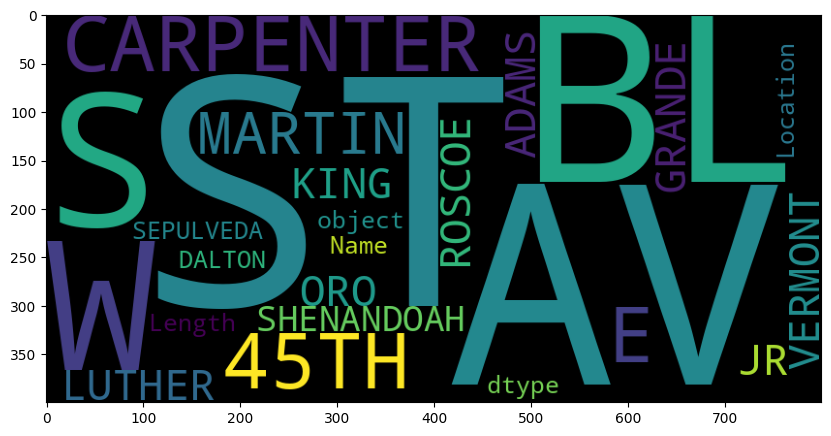

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


cloud = WordCloud(width=800, height=400, background_color='black').generate(str(train['Location']))
plt.figure(figsize=(10, 6))
plt.imshow(cloud)
plt.show()


In [9]:
train['Location'].value_counts()

Location
6TH                33
7TH                32
6TH ST             31
VERMONT AV         31
7TH ST             30
                   ..
2700 E 1ST ST       1
9300 SWINTON AV     1
MCKINLEY            1
WADE ST             1
DALTON AV           1
Name: count, Length: 12396, dtype: int64

<Axes: xlabel='Location'>

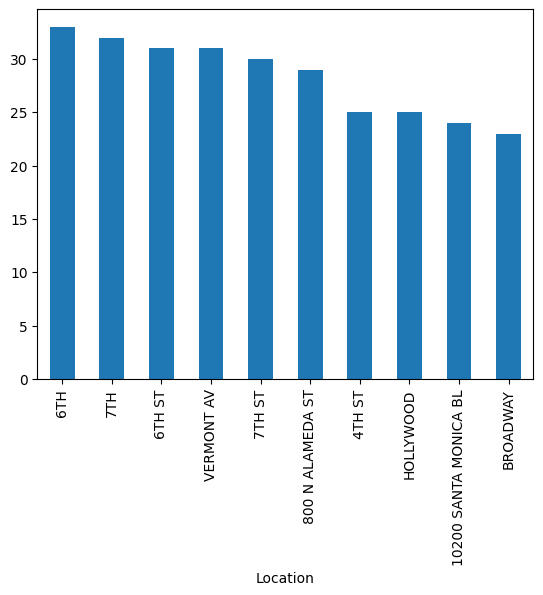

In [10]:
train['Location'].value_counts().head(10).plot(kind='bar')

# Cross_Street

In [11]:
# print('unqiue values before replacing the null values')
# print(train['Cross_Street'].unique())

# print("Number of unique values : " , len(train['Cross_Street'].unique()) )

# print('----------------------------------------------------')
train.loc[:,'Cross_Street']=train['Cross_Street'].fillna('')


print(' unqiue values after replacing the null values')


print(train['Cross_Street'].unique())

# train.loc[: , 'Cross_Street']=train['Cross_Street'].apply( lambda x : ' '.join(x.split()))

train.loc[: , 'Cross_Street']=train['Cross_Street'].apply( lambda x : ' '.join(x.split()))

print("Number of unique values : " , len(train['Cross_Street'].unique()) )


print('----------------------------------------------------')


print("Number of null values values the cross_street column originally has " ,16552)

 unqiue values after replacing the null values
['' 'ALAMEDA                      ST' 'LASSEN                       ST'
 ... 'VICTORIA' '39TH                         ST' 'HAVELOCK']
Number of unique values :  1496
----------------------------------------------------
Number of null values values the cross_street column originally has  16552


In [12]:
train.isnull().sum()

Location                     0
Cross_Street                 0
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

# Area_ID


unique values of area id are :
[15. 13. 19. 12. 11.  4. 14.  9. 17.  7.  6.  5. 21.  1. 10. 20. 16.  8.
 18.  3.  2.]
-------------------------------------------
Number of unique values are  21
Number of null values are  0
-------------------------------------------
Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64
-------------------------------------------


/tmp/ipykernel_18/2200294362.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['15.0' '13.0' '13.0' ... '8.0' '5.0' '3.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Area_ID']=train['Area_ID'].astype(str)


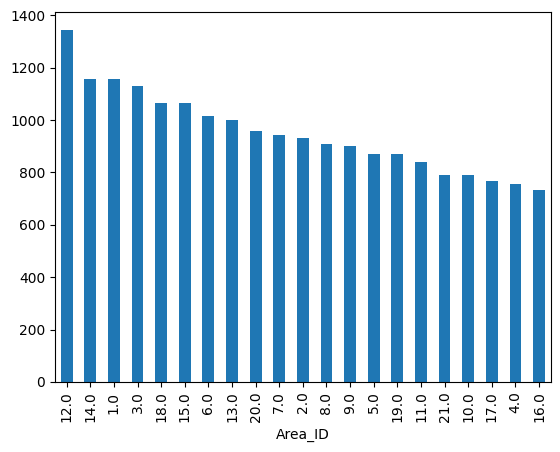

<Figure size 1500x1000 with 0 Axes>

In [13]:
print('unique values of area id are :')
print(train['Area_ID'].unique())

print('-------------------------------------------')

print('Number of unique values are ' , len(train['Area_ID'].unique()))


print('Number of null values are ' , train['Area_ID'].isnull().sum())


print('-------------------------------------------')

train.loc[:,'Area_ID']=train['Area_ID'].astype(str)
train.loc[:,'Area_ID']=train['Area_ID'].astype('category')

print(train['Area_ID'].value_counts())


print('-------------------------------------------')


Area_ID_value_counts=train['Area_ID'].value_counts()

Area_ID_value_counts.plot(kind='bar')
plt.figure(figsize=(15, 10))

plt.show()

# Area_Name

Area Name == Area id columns

In [14]:
print('unique areas are')
print(train['Area_Name'].unique())

print('-------------------------------------------')


print('Number of unique values are ' , len(train['Area_Name'].unique()))

print('-------------------------------------------')

print('Number of null values are ' , train['Area_Name'].isnull().sum())
print('-------------------------------------------')

print(train['Area_Name'].value_counts())


unique areas are
['N Hollywood' 'Newton' 'Mission' '77th Street' 'Northeast' 'Hollenbeck'
 'Pacific' 'Van Nuys' 'Devonshire' 'Wilshire' 'Hollywood' 'Harbor'
 'Topanga' 'Central' 'West Valley' 'Olympic' 'Foothill' 'West LA'
 'Southeast' 'Southwest' 'Rampart']
-------------------------------------------
Number of unique values are  21
-------------------------------------------
Number of null values are  0
-------------------------------------------
Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64


# Reporting_District_no

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  object 
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

unique areas are
['1563.0' '1367.0' '1343.0' ... '1778.0' '1199.0' '812.0']
-------------------------------------------
Number of unique values are  1120
-------------------------------------------
Number of null values are  0
-------------------------------------------
Reporting_District_no
645.0     99
162.0     85
1494.0    74
1822.0    72
182.0     72
          ..
452.0      1
871.0      1
1476.0     1
848.0      1
812.0      1
Name: count, Length: 1120, dtype: int64
-------------------------------------------


/tmp/ipykernel_18/4222087248.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1563.0' '1367.0' '1343.0' ... '849.0' '558.0' '397.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Reporting_District_no']=train['Reporting_District_no'].astype(str)


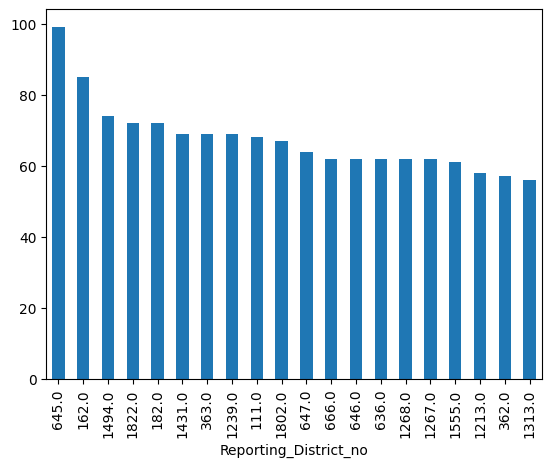

<Figure size 1000x600 with 0 Axes>

In [16]:
train.loc[:,'Reporting_District_no']=train['Reporting_District_no'].astype(str)
train.loc[:,'Reporting_District_no']=train['Reporting_District_no'].astype('category')

                                      
print('unique areas are')
print(train['Reporting_District_no'].unique())

print('-------------------------------------------')


print('Number of unique values are ' , len(train['Reporting_District_no'].unique()))

print('-------------------------------------------')

print('Number of null values are ' , train['Reporting_District_no'].isnull().sum())
print('-------------------------------------------')

print(train['Reporting_District_no'].value_counts())


Reporting_District_no_value_counts=train['Reporting_District_no'].value_counts()
print('-------------------------------------------')



Reporting_District_no_value_counts.head(20).plot(kind='bar')
plt.figure(figsize=(10, 6))
plt.show()


# Part 1-2

Unique values in Part 1-2 columns are: ['1.0' '2.0']
----------------------------------------
 value counts in Part 1-2 columns are: Part 1-2
1.0    11637
2.0     8363
Name: count, dtype: int64
----------------------------------------


/tmp/ipykernel_18/2574664916.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '2.0' ... '1.0' '2.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Part 1-2']=train['Part 1-2'].astype(str)


<Axes: xlabel='Part 1-2'>

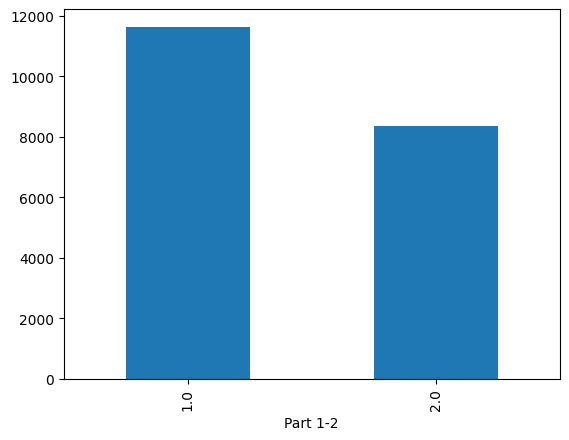

In [17]:
train.loc[:,'Part 1-2']=train['Part 1-2'].astype(str)

print("Unique values in Part 1-2 columns are:",train['Part 1-2'].unique())

print('----------------------------------------')

print(" value counts in Part 1-2 columns are:",train['Part 1-2'].value_counts())


print('----------------------------------------')

value_counts_part_1_2=train['Part 1-2'].value_counts()

value_counts_part_1_2.plot(kind='bar')

# Modus_Operandi

In [18]:
train['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

In [19]:
print("Unique values in Modus_Operandi are ",train['Modus_Operandi'].unique())
print(" ")
print("Each  row value is combination of diff-diff activities so thats the reason we have  10489 uniques values.")

print('')

print('----------------------------------------------------------')

print(train['Modus_Operandi'].value_counts())

print('')

Modus_Operandi_value_counts=train['Modus_Operandi'].value_counts()

print('')



print('----------------------------------------------------------')


train['Modus_Operandi'] = train['Modus_Operandi'].fillna('')

print("Number of null values after fill with empty string are ",train['Modus_Operandi'].isnull().sum())


Unique values in Modus_Operandi are  ['0385' '0906 0352 0371 0446 1822 0344 0416 0417' '0329 1202' ...
 '0416 0446 2004 0913' '1822 0209 0344 1414 1420'
 '1202 2038 0913 0602 1242 0553']
 
Each  row value is combination of diff-diff activities so thats the reason we have  10489 uniques values.

----------------------------------------------------------
Modus_Operandi
0344                                       826
0329                                       583
1501                                       187
0329 1300                                  135
0325                                       127
                                          ... 
1609 0329 1307 0344                          1
0344 2050 0910 2034                          1
0400 2000 0913                               1
1822 0342 0910 2049 2051 0305 0444 0344      1
1202 2038 0913 0602 1242 0553                1
Name: count, Length: 10489, dtype: int64


----------------------------------------------------------
Number of n

<Axes: xlabel='Modus_Operandi'>

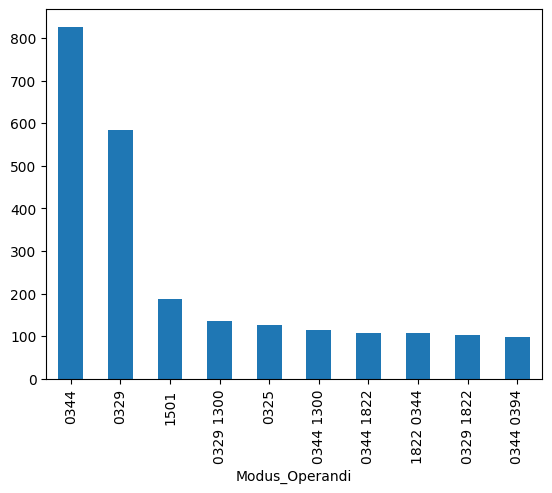

In [20]:
Modus_Operandi_value_counts.head(10).plot(kind='bar')

In [21]:
# def number_of_activities(s):
#     activities=[]
#     s=str(s)
#     a=s.split(' ')
#     for i in a:
#         if a not in activities:
#             activities.append(a)
#     return activities

def number_of_activities(s):
    if s=='':  # Handle NaN values
        return 0
    activities_list=s.split()
    activity_count = list(set(activities_list))
#     activities = set()  # Using a set to avoid duplicates efficiently
#     for activity in s.split(' '):
#         activities.add(str(activity))
#     activities=' '.join(activities)    
    return len(activity_count)
train['activity_count']=train['Modus_Operandi'].apply(number_of_activities)
# df.drop('Modus_Operandi',axis=1)
# df['Modus_Operandi']=df['unique_activities']
# df.drop('unique_activities',axis=1,inplace=True)

In [22]:
train[['Modus_Operandi','activity_count']]

,Modus_Operandi,activity_count
0,0385,1
1,0906 0352 0371 0446 1822 0344 0416 0417,8
2,0329 1202,2
3,0329 1300,2
4,0416 0945 1822 0400 0417 0344,6
...,...,...
19995,0416 0446 2004 0913,4
19996,1822 0209 0344 1414 1420,5
19997,0344 1822 1420,3
19998,1202 2038 0913 0602 1242 0553,6


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

class MultiLabelBinarizerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Status and Status_Description 

Status and Status_Description convey same information 

Number of unique values in Status are  ['IC' 'AO' 'AA' 'JA' 'JO']
 values in Status are  Status
IC    15236
AO     2597
AA     2054
JA       70
JO       43
Name: count, dtype: int64
Null values in status are 0

--------------------------------------------------------------

Number of unique values in Status_Description are  ['Invest Cont' 'Adult Other' 'Adult Arrest' 'Juv Arrest' 'Juv Other']
 values in Status_Description are  Status_Description
Invest Cont     15236
Adult Other      2597
Adult Arrest     2054
Juv Arrest         70
Juv Other          43
Name: count, dtype: int64
Null values in Status_Description are 0

--------------------------------------------------------------



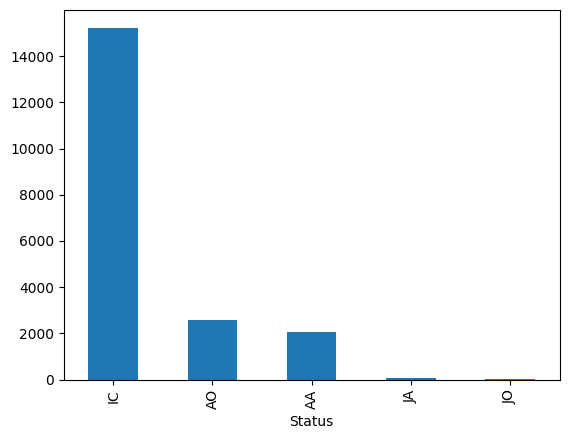

<Axes: xlabel='Status_Description'>

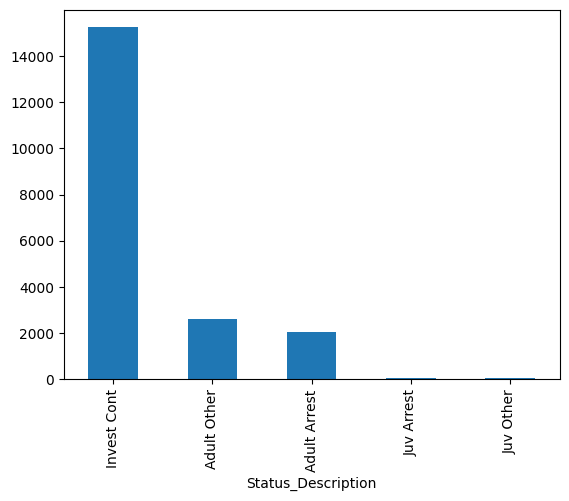

In [24]:
print("Number of unique values in Status are ",train['Status'].unique())

print(" values in Status are ",train['Status'].value_counts())

print('Null values in status are' ,train['Status'].isnull().sum() )

Status_value_counts=train['Status'].value_counts()


print('')
print('--------------------------------------------------------------')
print('')

print("Number of unique values in Status_Description are ",train['Status_Description'].unique())

print(" values in Status_Description are ",train['Status_Description'].value_counts())

print('Null values in Status_Description are' ,train['Status_Description'].isnull().sum() )


Status_Description_value_counts=train['Status_Description'].value_counts()



print('')
print('--------------------------------------------------------------')
print('')

Status_value_counts.plot(kind='bar')
plt.show()

Status_Description_value_counts.plot(kind='bar')


# Weapon_Used_Code  and Weapon_Description

Both columns gives same information


In [25]:
print('Number of null values are')
train[['Weapon_Description','Weapon_Used_Code']].isnull().sum()

Number of null values are


Weapon_Description    12665
Weapon_Used_Code      12665
dtype: int64

In [26]:
print('Number of unqiue values are')
train['Weapon_Description'].value_counts()

Number of unqiue values are


Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990
UNKNOWN WEAPON/OTHER WEAPON                        789
VERBAL THREAT                                      546
HAND GUN                                           388
KNIFE WITH BLADE 6INCHES OR LESS                   160
SEMI-AUTOMATIC PISTOL                              154
UNKNOWN FIREARM                                    131
OTHER KNIFE                                        125
VEHICLE                                             84
MACE/PEPPER SPRAY                                   80
ROCK/THROWN OBJECT                                  63
BOTTLE                                              55
PIPE/METAL PIPE                                     52
CLUB/BAT                                            51
STICK                                               49
KITCHEN KNIFE                                       45
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH            43
AIR PISTOL/REVOLVER/RIFLE/BB GUN              

In [27]:
train.loc[train['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' , 'Weapon_Description'] = 'Physical Force'

# EXPLOXIVE DEVICE                                     3
# RAZOR                                                1
# LIQUOR/DRUGS                                         1
# DOG/ANIMAL (SIC ANIMAL ON)                           1
# SWORD   


# NA                                                3153
# STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    1003
# sharp_heavy_object                                 431
# other_weapon                                       170
# Gun                                                164
# fire                                                44
# VEHICLE                                             28
# Physical Force                                       4
# EXPLOXIVE DEVICE                                     3

def gun(s):
    
    if pd.isna(s):
        return 'NA'
    t=s.replace('/',' ')
    listt=t.split(' ' or '/')
    
    gun_keywords=['gun','pistol','revolver','rifle','shotgun','AK47','explosive','exploxive']
    
    sharp_heavy_object=['blade','razor','stone','sword','knife','metal','screwdriver','cleaver', 'glass','machete' ,'iron' , 'cutting','axe' ,'instrument','hammer','weapon','object','bottle','weapons','brass','scissors']
    
    other_weapon = ['bomb','threat', 'demand', 'poison', 'ice', 'scalding', 'board','block' ,'brick', 'stick', 'bat', 'spray','drugs','dog']
    
    physical_presence=['physical','presence','strong-arm']
    
    fire=['firearm' , 'fire' ]

    for i in listt:
        if i.lower() in gun_keywords:
            return 'Gun'
        elif i.lower() in sharp_heavy_object:
            return 'sharp_heavy_object'
        
        elif i.lower() in fire:
            return 'fire'
        elif i.lower() in other_weapon:
            return 'other_weapon'
        elif i.lower() in physical_presence:
            return 'Physical Force'
        elif i.lower() == 'strong-arm':
            return 'Physical Force'
            
        
    return s
    



train.loc[:,'Weapon_Description']=train['Weapon_Description'].apply(lambda x: gun(x))

In [28]:
print('Number of unqiue values are')
train['Weapon_Description'].value_counts()

Number of unqiue values are


Weapon_Description
NA                    12665
Physical Force         4008
sharp_heavy_object     1613
other_weapon            772
Gun                     687
fire                    171
VEHICLE                  84
Name: count, dtype: int64

In [29]:
distribution = train['Weapon_Description'][train['Weapon_Description'] != 'NA'].value_counts(normalize=True)

missing = train[train['Weapon_Description']=='NA']['Weapon_Description'].count()

imputed_values = np.random.choice(distribution.index, size=missing, p=distribution.values)


train.loc[train['Weapon_Description']=='NA', 'Weapon_Description'] = imputed_values

In [30]:
train['Weapon_Description'].value_counts()

Weapon_Description
Physical Force        10916
sharp_heavy_object     4346
other_weapon           2122
Gun                    1886
fire                    481
VEHICLE                 249
Name: count, dtype: int64

In [31]:
train.isnull().sum()

Location                     0
Cross_Street                 0
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi               0
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description           0
Status                       0
Status_Description           0
Crime_Category               0
activity_count               0
dtype: int64

# Premise_Description , Premise_Code


In [32]:
print("Unique values are:")
print('')
print(train['Premise_Code'].unique())

print('')
print('')

print(train['Premise_Description'].unique())

Unique values are:

[101. 216. 501. 401. 502. 202. 104. 108. 121. 102. 203. 122. 707. 503.
 506. 509. 710. 103. 602. 519. 406. 751. 210. 123. 801. 601. 243. 242.
 504. 124. 505. 119. 252. 109. 704. 152. 120. 301. 404. 720. 405. 402.
 213. 514. 248. 702. 708. 834. 212. 416. 954. 158. 403. 701. 721. 725.
 605. 726. 912. 729. 139. 145. 208. 719. 201. 141. 107. 222. 144. 116.
 507. 221. 254. 757. 217. 110. 408. 146. 510. 750. 229. 727. 249. 236.
 738. 516. 735. 716. 908. 232. 517. 722. 515. 874. 518. 118. 127. 151.
 932. 411. 415. 910. 414. 220. 255. 407. 239. 156. 233. 717. 900. 956.
 949. 218. 732. 936. 244. 835. 715. 410. 231. 728. 417. 207. 247. 206.
 913. 733. 409. 811. 235. 724. 902. 712. 941. 117. 412. 705. 512. 907.
 142. 903. 953. 511. 753. 736. 205. 897. 875. 138. 709. 128. 209. 230.
 916. 723. 140. 157. 969. 135. 302. 958. 251. 921. 730. 809. 740. 957.
 917. 905. 214. 148. 706. 909. 896. 418. 744. 911. 802. 154. 413. 895.
 966. 219. 234. 948. 922. 603. 238. 906. 951. 935. 950. 1

In [33]:
train.loc[:,'Premise_Code']=train.loc[:,'Premise_Code'].astype(str)

print("value counts are:")
print('')
print(train['Premise_Code'].value_counts())


value counts are:

Premise_Code
101.0    5033
501.0    3379
502.0    2491
108.0    1437
102.0     978
         ... 
214.0       1
909.0       1
896.0       1
744.0       1
250.0       1
Name: count, Length: 217, dtype: int64


/tmp/ipykernel_18/3041038907.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['101.0' '216.0' '501.0' ... '102.0' '501.0' '101.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Premise_Code']=train.loc[:,'Premise_Code'].astype(str)


# Victim_Sex 

In [34]:
print("Unique values of victim sex are",train['Victim_Sex'].unique())


print('')
print('')

print('Value counts are')
print(train['Victim_Sex'].value_counts())

print('')
print('')


print("Number of null values are" , train['Victim_Sex'].isnull().sum())





distribution_gender = train['Victim_Sex'].dropna().value_counts(normalize=True)

missing_gender = train['Victim_Sex'].isna().sum()

imputed_values_gender = np.random.choice(distribution_gender.index, size=missing_gender, p=distribution_gender.values)


train.loc[train['Victim_Sex'].isna(), 'Victim_Sex'] = imputed_values_gender



print('')
print('')



print("Number of null values after imputing are" , train['Victim_Sex'].isnull().sum())

train.loc[:,'Victim_Sex']=train.loc[:,'Victim_Sex'].replace('H','X')

Unique values of victim sex are ['M' 'X' 'F' nan 'H']


Value counts are
Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64


Number of null values are 2624


Number of null values after imputing are 0


# Victim_Descent

In [35]:
distribution_Descent = train['Victim_Descent'].dropna().value_counts(normalize=True)

missing_Descent = train['Victim_Descent'].isna().sum()

imputed_values_Descent = np.random.choice(distribution_Descent.index, size=missing_Descent, p=distribution_Descent.values)


train.loc[train['Victim_Descent'].isna(), 'Victim_Descent'] = imputed_values_Descent



unique values are
['W' 'H' 'B' 'X' 'O' 'A' 'K' 'C' 'F' 'I' 'J' 'Z' 'P' 'V' 'G' 'D' 'U']


Victim_Descent
H    7097
W    4858
B    3318
X    2144
O    1840
A     485
K      94
C      58
F      53
J      19
I      13
V       8
P       5
Z       3
G       2
U       2
D       1
Name: count, dtype: int64


<Axes: xlabel='Victim_Descent'>

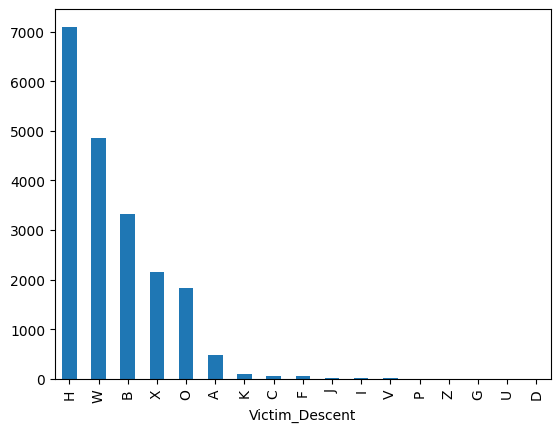

In [36]:
print('unique values are')
print(train['Victim_Descent'].unique())

print('')
print('')

print(train['Victim_Descent'].value_counts())

Victim_Descent_value_counts=train['Victim_Descent'].value_counts()

Victim_Descent_value_counts.plot(kind='bar')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  object 
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  object 
 10  Part 1-2               20000 non-null  object 
 11  Modus_Operandi         20000 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             20000 non-null  object 
 14  Victim_Descent         20000 non-null  object 
 15  Pr

# Numerical Columns

# Date_Reported ,Date_Occurred

In [38]:
def day_category(x):
    if 400<=x<1200:
        return 'Morning'
    elif 1200<=x<1700:
        return 'Daytime'
    elif 1800<=x<2100:
        return 'Evening'
    else:
        return 'Night'
    
train['day_category']=train['Time_Occurred'].apply(day_category )   
train.drop('Time_Occurred',inplace=True,axis=1)

In [39]:

def extract_date(d):
    str(d)
    date=d.split(' ')[0]
    
    
    date=pd.to_datetime(date).date()
    
    
    return date
    
train['Date_Reported']=train['Date_Reported'].apply(extract_date)
train['Date_Occurred']=train['Date_Occurred'].apply(extract_date)
    
# k=train['Date_Reported'][0]-train['Date_Occurred'][0]
# k.days


#converting to datetime

train['Date_Reported']=pd.to_datetime(train['Date_Reported']).dt.date
train['Date_Occurred']=pd.to_datetime(train['Date_Occurred']).dt.date

#this gives daysss anf time too 
train['reporting_delay_day_count']=(train['Date_Reported']-train['Date_Occurred'])

# this day count calculate the days count 
def day_count(d):
    return d.days
train['reporting_delay_day_count']=train['reporting_delay_day_count'].apply(day_count)




# dropping the date reported and date occured cols


train.drop(['Date_Reported','Date_Occurred'],axis=1, inplace=True)

In [40]:
print(train['Victim_Age'].unique())
# df.loc[df['Victim_Age']<0,'Victim_Age']=0
train.loc[train['Victim_Age']<0,'Victim_Age']=0

[75. 41. 67. 61.  0. 50. 68. 22. 31. 46. 72. 26. 38. 37. 42. 40. 53. 60.
 29. 13. 33. 27. 15. 23. 74. 63. 78. 51. 44. 34. 69. 36. 52. 25. 49. 48.
 32. 18. 35. 24. 39. 16. 28. 47. 30. 64. 76.  5. 58. 45. 57. 19. 55. 54.
 21. 65. 17. 20. 77. 82. 56. -2. 84. 59. 43.  7. 70. 66. 62. 14. 80. 71.
 81. 96. 12. 11.  4. 83. 10.  8.  6. 88. 86. 73.  9. 87. 85. 93. 95. 99.
 79.  3.  2. 91. 92. 90. 89. 98. -1. 94.]


In [41]:
print(train['Victim_Age'].unique())

[75. 41. 67. 61.  0. 50. 68. 22. 31. 46. 72. 26. 38. 37. 42. 40. 53. 60.
 29. 13. 33. 27. 15. 23. 74. 63. 78. 51. 44. 34. 69. 36. 52. 25. 49. 48.
 32. 18. 35. 24. 39. 16. 28. 47. 30. 64. 76.  5. 58. 45. 57. 19. 55. 54.
 21. 65. 17. 20. 77. 82. 56. 84. 59. 43.  7. 70. 66. 62. 14. 80. 71. 81.
 96. 12. 11.  4. 83. 10.  8.  6. 88. 86. 73.  9. 87. 85. 93. 95. 99. 79.
  3.  2. 91. 92. 90. 89. 98. 94.]


In [42]:
train.loc[:,'Victim_Age']=train.loc[:,'Victim_Age'].apply(lambda x : int(x))
train.loc[train['Victim_Age']==0,'Victim_Age']=train['Victim_Age'].mean()
# train.loc['Victim_Age']=train.loc['Victim_Age'].apply(lambda x: int(x))

In [43]:

# def gun(s):
#     t=s.replace('/',' ')
#     listt=t.split(' ' or '/')
#     gun_keywords=['gun','pistol','revolver','rifle','shotgun']
    
#     sharp_heavy_object=['blade','stone','knife','metal','screwdriver','cleaver', 'glass','machete' ,'iron' , 'cutting','axe' ,'instrument','hammer','weapon','object','bottle','weapons','brass','scissors']
    
#     other_weapon = ['bomb','threat', 'demand', 'poison', 'ice', 'scalding', 'board','block' ,'brick', 'stick', 'bat', 'spray']
    
#     physical_presence=['physical','presence']
    
#     fire=['firearm' , 'fire' ]

#     for i in listt:
#         if i.lower() in gun_keywords:
#             return 'Gun'
#         elif i.lower() in sharp_heavy_object:
#             return 'sharp_heavy_object'
        
#         elif i.lower() in fire:
#             return 'fire'
#         elif i.lower() in other_weapon:
#             return 'other_weapon'
#         elif i.lower() in physical_presence:
#             return 'Physical Force'
        
#     return s
    



# df.loc[:,'Weapon_Description']=df['Weapon_Description'].apply(gun)

# new Columns 

In [44]:
numerical_columns=['Latitude','Longitude','Victim_Age','activity_count','reporting_delay_day_count']
categorical_columns=['Area_ID','Part 1-2','Victim_Sex','Victim_Descent','Weapon_Description','Status','day_category'] #ohe
# multilabel_binarizer=[['Modus_Operandi']] 

new_train=train[['Latitude','Longitude','Victim_Age','activity_count','reporting_delay_day_count','Area_ID','Part 1-2','Victim_Sex','Victim_Descent','Weapon_Description','Status','day_category','Modus_Operandi']]
new_train_y=train['Crime_Category']






# new Column Transformer


In [45]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler , OneHotEncoder

new_ct=ColumnTransformer(transformers=[
    
    ('numerical_cols' , StandardScaler(),['Latitude','Longitude','reporting_delay_day_count','Victim_Age','activity_count']),
    ('categorical_cols' , OneHotEncoder(handle_unknown='ignore'),['day_category','Victim_Sex','Victim_Descent','Part 1-2','Area_ID','Status','Weapon_Description']),
    ('multi_label_binarizer', MultiLabelBinarizerWrapper(), 'Modus_Operandi')
])

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   20000 non-null  object 
 1   Cross_Street               20000 non-null  object 
 2   Latitude                   20000 non-null  float64
 3   Longitude                  20000 non-null  float64
 4   Area_ID                    20000 non-null  object 
 5   Area_Name                  20000 non-null  object 
 6   Reporting_District_no      20000 non-null  object 
 7   Part 1-2                   20000 non-null  object 
 8   Modus_Operandi             20000 non-null  object 
 9   Victim_Age                 20000 non-null  float64
 10  Victim_Sex                 20000 non-null  object 
 11  Victim_Descent             20000 non-null  object 
 12  Premise_Code               20000 non-null  object 
 13  Premise_Description        19995 non-null  obj

In [47]:
new_train

,Latitude,Longitude,Victim_Age,activity_count,reporting_delay_day_count,Area_ID,Part 1-2,Victim_Sex,Victim_Descent,Weapon_Description,Status,day_category,Modus_Operandi
0,34.1522,-118.3910,75.0000,1,3,15.0,1.0,M,W,Physical Force,IC,Evening,0385
1,34.0028,-118.2391,41.0000,8,0,13.0,1.0,M,H,Physical Force,IC,Daytime,0906 0352 0371 0446 1822 0344 0416 0417
2,34.0111,-118.2653,67.0000,2,0,13.0,2.0,M,B,Physical Force,IC,Morning,0329 1202
3,34.2953,-118.4590,61.0000,2,2,19.0,1.0,M,H,Physical Force,IC,Evening,0329 1300
4,33.9787,-118.2918,30.1354,6,0,12.0,1.0,X,X,Physical Force,IC,Morning,0416 0945 1822 0400 0417 0344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,51.0000,4,0,3.0,2.0,M,H,Physical Force,IC,Morning,0416 0446 2004 0913
19996,34.2212,-118.5011,30.1354,5,0,10.0,1.0,M,W,other_weapon,IC,Night,1822 0209 0344 1414 1420
19997,34.0571,-118.3815,42.0000,3,0,8.0,1.0,M,H,sharp_heavy_object,IC,Daytime,0344 1822 1420
19998,33.7451,-118.2835,76.0000,6,0,5.0,2.0,F,H,Physical Force,IC,Morning,1202 2038 0913 0602 1242 0553


In [48]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score,f1_score

# train_test_split

In [49]:
# df.shape

from sklearn.model_selection import train_test_split

xtrain_1 , xtest_1 , ytrain_1 , ytest_1 = train_test_split(new_train ,new_train_y ,test_size=0.2 , random_state=42 ,shuffle=True,stratify = new_train_y )

# DummyClassifier

In [50]:
from sklearn.dummy import DummyClassifier

# dummy_clf=DummyClassifier(random_state=42 , strategy="most_frequent")
# dummy_clf.fit(xtrain, ytrain)
# print('Dummy train score', dummy_clf.score(ytrain,ytrain))
# print('Dummy predicted train score', dummy_clf.score(xtrain,dummy_clf.predict(xtrain)))

# print('Dummy test score', dummy_clf.score(xtest, ytest))

# print('Dummy predicted test score', dummy_clf.score(xtest, dummy_clf.predict(xtest)))
data_split= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


model_dummy=DummyClassifier(random_state=42 , strategy="most_frequent")

dummy_pipeline=Pipeline(steps=[('new_ct',new_ct),('model_dummy',model_dummy)])



accuracy_scores_dummy_pipeline = []
f1_scores_dummy_pipeline = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    dummy_pipeline.fit(X_train, y_train)
    
    y_pred = dummy_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_scores_dummy_pipeline.append(accuracy)
    f1_scores_dummy_pipeline.append(f1)
    
    
    
    
    
    
    
print("Accuracy scores for each fold: ", accuracy_scores_dummy_pipeline)
print("Average accuracy: ", np.mean(accuracy_scores_dummy_pipeline))
print("F1 scores for each fold: ", f1_scores_dummy_pipeline)
print("Average F1 score: ", np.mean(f1_scores_dummy_pipeline))
    
    
    


Accuracy scores for each fold:  [0.5834375, 0.5834375, 0.5834375, 0.583125, 0.583125]
Average accuracy:  0.5833125
F1 scores for each fold:  [0.429949797710677, 0.429949797710677, 0.429949797710677, 0.42957412159494673, 0.42957412159494673]
Average F1 score:  0.4297995272643849


# Logistic

In [51]:
from sklearn.model_selection import train_test_split



from sklearn.linear_model import LogisticRegression
logistic_model_plain = Pipeline(steps=[('new_ct',new_ct),('logistic_reg',LogisticRegression( max_iter=1200 ,random_state=42))])

logistic_model_plain.fit(xtrain_1, ytrain_1)

logistic_model_plain.score(xtest_1,ytest_1)

0.816

Logistic Full Model

In [52]:
from sklearn.linear_model import LogisticRegression

pipe_logistic_model = Pipeline(steps=[('new_ct',new_ct),('logistic_reg',LogisticRegression( max_iter=1200 ,random_state=42))])

model_score_test=[]
accuracy_scores_logistic_pipeline = []
f1_scores_logistic_pipeline = []



for train_index, test_index in data_split.split(new_train, new_train_y):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    pipe_logistic_model.fit(X_train, y_train)
    
    y_pred_pipe_logistic_model = pipe_logistic_model.predict(X_test)
    
    
    model_score=pipe_logistic_model.score(X_test,y_test)

    accuracy = accuracy_score(y_test, y_pred_pipe_logistic_model)
    f1 = f1_score(y_test, y_pred_pipe_logistic_model, average='weighted')
    accuracy_scores_logistic_pipeline.append(accuracy)
    f1_scores_logistic_pipeline.append(f1)
    model_score_test.append(model_score)
    
    
    
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_logistic_pipeline)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_logistic_pipeline))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_logistic_pipeline)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_logistic_pipeline))
print("model_score_test list  using pipe_logistic_model " ,model_score_test )



Accuracy scores for each fold using pipe_logistic_model:  [0.82025, 0.8115, 0.81225, 0.82175, 0.809]
Average accuracy using pipe_logistic_model:  0.81495
F1 scores for each fold using pipe_logistic_model:  [0.809439723660626, 0.8022573835241563, 0.8028973020590026, 0.8130201482676259, 0.7980089802015197]
Average F1 score using pipe_logistic_model:  0.8051247075425861
model_score_test list  using pipe_logistic_model  [0.82025, 0.8115, 0.81225, 0.82175, 0.809]


Logistic Half model

In [53]:
from sklearn.linear_model import LogisticRegression

pipe_logistic_model_2 = Pipeline(steps=[('new_ct',new_ct),('logistic_reg',LogisticRegression( max_iter=1200 ,random_state=42))])

model_score_test=[]
accuracy_scores_logistic_pipeline = []
f1_scores_logistic_pipeline = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    pipe_logistic_model_2.fit(X_train, y_train)
    
    y_pred_pipe_logistic_model_2 = pipe_logistic_model_2.predict(X_test)
    
    
    model_score=pipe_logistic_model_2.score(X_test,y_test)

    accuracy = accuracy_score(y_test, y_pred_pipe_logistic_model_2)
    f1 = f1_score(y_test, y_pred_pipe_logistic_model_2, average='weighted')
    accuracy_scores_logistic_pipeline.append(accuracy)
    f1_scores_logistic_pipeline.append(f1)
    model_score_test.append(model_score)
    
    
    
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_logistic_pipeline)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_logistic_pipeline))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_logistic_pipeline)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_logistic_pipeline))
print("model_score_test list  using pipe_logistic_model " ,model_score_test )



Accuracy scores for each fold using pipe_logistic_model:  [0.814375, 0.8171875, 0.8103125, 0.8203125, 0.808125]
Average accuracy using pipe_logistic_model:  0.8140625
F1 scores for each fold using pipe_logistic_model:  [0.8058343205588995, 0.807238000740563, 0.8002682626832922, 0.8099417724282472, 0.7990416333419468]
Average F1 score using pipe_logistic_model:  0.8044647979505897
model_score_test list  using pipe_logistic_model  [0.814375, 0.8171875, 0.8103125, 0.8203125, 0.808125]


In [54]:
pipe_logistic_model_2.score(xtest_1,ytest_1)

0.81475


# SVC


In [55]:
from sklearn.svm import SVC
pipe_svc_half=Pipeline(steps=[('new_ct',new_ct),('svc',SVC(decision_function_shape='ovr'))])


model_score_test_half=[]
accuracy_scores_SVC_half = []
f1_scores_SVC_half = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    pipe_svc_half.fit(X_train, y_train)
    
    y_pred_svc_half = pipe_svc_half.predict(X_test)
    
    
    model_score_svc=pipe_svc_half.score(X_test,y_test)
    

    accuracy_svc = accuracy_score(y_test, y_pred_svc_half)
    
    
    f1_svc = f1_score(y_test, y_pred_svc_half, average='weighted')
    
    
    accuracy_scores_SVC_half.append(accuracy_svc)
    f1_scores_SVC_half.append(f1_svc)
    model_score_test_half.append(model_score_svc)
    
    
    
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_SVC_half)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_SVC_half))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_SVC_half)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_SVC_half))
print("model_score_test list  using pipe_logistic_model " ,model_score_test_half )



Accuracy scores for each fold using pipe_logistic_model:  [0.8509375, 0.8609375, 0.849375, 0.8559375, 0.85375]
Average accuracy using pipe_logistic_model:  0.8541875000000001
F1 scores for each fold using pipe_logistic_model:  [0.8429099141196416, 0.85319844909912, 0.8409834266781695, 0.8473868254718212, 0.8454770850743634]
Average F1 score using pipe_logistic_model:  0.8459911400886231
model_score_test list  using pipe_logistic_model  [0.8509375, 0.8609375, 0.849375, 0.8559375, 0.85375]


In [56]:
from sklearn.svm import SVC
pipe_svc_full=Pipeline(steps=[('new_ct',new_ct),('svc',SVC(decision_function_shape='ovr'))])


model_score_test_full=[]
accuracy_scores_SVC_full = []
f1_scores_SVC_full = []



for train_index, test_index in data_split.split(new_train, new_train_y):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    pipe_svc_full.fit(X_train, y_train)
    
    y_pred_svc_full = pipe_svc_full.predict(X_test)
    
    
    model_score_svc=pipe_svc_full.score(X_test,y_test)

    accuracy_svc = accuracy_score(y_test, y_pred_svc_full)
    
    f1_svc = f1_score(y_test, y_pred_svc_full, average='weighted')
    
    
    accuracy_scores_SVC_full.append(accuracy_svc)
    f1_scores_SVC_full.append(f1_svc)
    model_score_test_full.append(model_score_svc)
    
    
    
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_SVC_full)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_SVC_full))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_SVC_full)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_SVC_full))
print("model_score_test list  using pipe_logistic_model " ,model_score_test_full )



Accuracy scores for each fold using pipe_logistic_model:  [0.8635, 0.846, 0.85325, 0.8555, 0.85475]
Average accuracy using pipe_logistic_model:  0.8545999999999999
F1 scores for each fold using pipe_logistic_model:  [0.8550341627853669, 0.8382071710703208, 0.8456999201933723, 0.8473101189717284, 0.845885628757552]
Average F1 score using pipe_logistic_model:  0.846427400355668
model_score_test list  using pipe_logistic_model  [0.8635, 0.846, 0.85325, 0.8555, 0.85475]


# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier_half=Pipeline(steps=[('new_ct' , new_ct ),( 'knn' ,KNeighborsClassifier(n_neighbors=16 , p=1,leaf_size=19 ,weights='distance'))])

KNN_model_score_test_half=[]
accuracy_scores_KNN_half = []
f1_scores_KNN_half = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    knn_classifier_half.fit(X_train, y_train)
    
    y_pred_KNN_half = knn_classifier_half.predict(X_test)
    
    
    model_score_KNN=knn_classifier_half.score(X_test,y_test)
    

    accuracy_KNN = accuracy_score(y_test, y_pred_KNN_half)
    
    
    f1_KNN = f1_score(y_test, y_pred_KNN_half, average='weighted')
    
    
    accuracy_scores_KNN_half.append(accuracy_KNN)
    
    f1_scores_KNN_half.append(f1_KNN)
    
    KNN_model_score_test_half.append(model_score_KNN)
    
    
    
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_KNN_half)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_KNN_half))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_KNN_half)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_KNN_half))
print("model_score_test list  using pipe_logistic_model " ,KNN_model_score_test_half )


Accuracy scores for each fold using pipe_logistic_model:  [0.8171875, 0.8171875, 0.8084375, 0.818125, 0.8128125]
Average accuracy using pipe_logistic_model:  0.8147499999999999
F1 scores for each fold using pipe_logistic_model:  [0.799195352494535, 0.7984934209925351, 0.7901654404384283, 0.8001140779338967, 0.7955404864289431]
Average F1 score using pipe_logistic_model:  0.7967017556576677
model_score_test list  using pipe_logistic_model  [0.8171875, 0.8171875, 0.8084375, 0.818125, 0.8128125]


# Desision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_half = Pipeline([ ('new_ct',new_ct),('DecisionTreeClassifier',DecisionTreeClassifier()) ])


decision_tree_model_score_test_half=[]
accuracy_scores_decision_tree_half = []
f1_scores_decision_tree_half = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    decision_tree_half.fit(X_train, y_train)
    
    y_pred_decision_tree_half = decision_tree_half.predict(X_test)
    
    
    model_score_decision_tree=decision_tree_half.score(X_test,y_test)
    

    accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree_half)
    
    
    f1_decision_tree = f1_score(y_test, y_pred_decision_tree_half, average='weighted')
    
    
    accuracy_scores_decision_tree_half.append(accuracy_decision_tree)
    
    f1_scores_decision_tree_half.append(f1_decision_tree)
    
    decision_tree_model_score_test_half.append(model_score_decision_tree)
    
    
    
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_decision_tree_half)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_decision_tree_half))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_decision_tree_half)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_decision_tree_half))
print("model_score_test list  using pipe_logistic_model " ,decision_tree_model_score_test_half )

Accuracy scores for each fold using pipe_logistic_model:  [0.7940625, 0.8115625, 0.7971875, 0.8078125, 0.8134375]
Average accuracy using pipe_logistic_model:  0.8048125
F1 scores for each fold using pipe_logistic_model:  [0.7961509336747539, 0.8139144344127652, 0.7988731716533295, 0.8071798425290915, 0.8112093995401628]
Average F1 score using pipe_logistic_model:  0.8054655563620206
model_score_test list  using pipe_logistic_model  [0.7940625, 0.8115625, 0.7971875, 0.8078125, 0.8134375]


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

decision_tree_full = Pipeline([ ('new_ct',new_ct),('DecisionTreeClassifier',DecisionTreeClassifier()) ])


decision_tree_model_score_test_full=[]
accuracy_scores_decision_tree_full = []
f1_scores_decision_tree_full = []



for train_index, test_index in data_split.split(new_train, new_train_y):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    decision_tree_full.fit(X_train, y_train)
    
    y_pred_decision_tree_full = decision_tree_full.predict(X_test)
    
    
    model_score_decision_tree=decision_tree_full.score(X_test,y_test)
    

    accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree_full)
    
    
    f1_decision_tree = f1_score(y_test, y_pred_decision_tree_full, average='weighted')
    
    
    accuracy_scores_decision_tree_full.append(accuracy_decision_tree)
    
    f1_scores_decision_tree_full.append(f1_decision_tree)
    
    decision_tree_model_score_test_full.append(model_score_decision_tree)
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_decision_tree_full)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_decision_tree_full))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_decision_tree_full)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_decision_tree_full))
print("model_score_test list  using pipe_logistic_model " ,decision_tree_model_score_test_full )

Accuracy scores for each fold using pipe_logistic_model:  [0.80675, 0.802, 0.7925, 0.805, 0.80875]
Average accuracy using pipe_logistic_model:  0.8030000000000002
F1 scores for each fold using pipe_logistic_model:  [0.8065984689292234, 0.8037588154358026, 0.7937650297466317, 0.8049963417842557, 0.809118140266099]
Average F1 score using pipe_logistic_model:  0.8036473592324025
model_score_test list  using pipe_logistic_model  [0.80675, 0.802, 0.7925, 0.805, 0.80875]


In [60]:
# df.info()

In [61]:
# from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

In [62]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import MultiLabelBinarizer

# class MultiLabelBinarizerWrapper(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.mlb = MultiLabelBinarizer()

#     def fit(self, X, y=None):
#         self.mlb.fit(X)
#         return self

#     def transform(self, X):
#         return self.mlb.transform(X)

In [63]:

# from sklearn.preprocessing import StandardScaler , OneHotEncoder  , MultiLabelBinarizer
# from sklearn.feature_extraction.text import CountVectorizer
# ct=ColumnTransformer(transformers=[
    
#     ('numerical_cols' , StandardScaler(),['Latitude','Longitude','reporting_delay_day_count','Victim_Age']),
#     ('categorical_cols' , OneHotEncoder(handle_unknown='ignore'),['day_category','Victim_Sex','Victim_Descent','Part 1-2','Area_ID','Status','Weapon_Description']),
#     ('multi_label_binarizer', MultiLabelBinarizerWrapper(), 'Modus_Operandi')
# ])
    

In [64]:
# len(df['Area_ID'].value_counts())

In [65]:
# pipe_logistic = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegression(solver='saga',C=0.1,warm_start=True, max_iter=1500 ,random_state=42))])

In [66]:
# pipe_logistic_sag = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegressionCV(solver='sag',penalty='l2',multi_class='ovr', max_iter=2000 ,random_state=42))])

# pipe_logistic_sag.fit(xtrain,ytrain)

# pipe_logistic_sag.score(xtest,ytest)

In [67]:
# pipe_logistic.fit(xtrain,ytrain)

In [68]:
# pipe_logistic.score(xtest,ytest)

In [69]:
# from sklearn.metrics import make_scorer ,f1_score
# logCV_scorer=make_scorer(f1_score , average='auto')
# pipe_logistic_multiclass = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegressionCV(cv=3,penalty='l2',solver='saga',multi_class='multinomial',Cs=[0.1, 0.5, 1] ,max_iter=3000 ,random_state=42))])

# pipe_logistic_multiclass.fit(xtrain,ytrain)
# pipe_logistic_multiclass.score(xtrain,ytrain)

# pipe_logistic_multiclass.score(xtest,ytest)




# # 0.81175


In [70]:
# from sklearn.metrics import make_scorer ,f1_score
# logCV_scorer=make_scorer(f1_score , average='auto')
# pipe_logistic_ovr = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegressionCV(cv=5,penalty='l2',solver='liblinear',multi_class='ovr',Cs=[0.1, 0.5, 1] ,max_iter=2400 ,random_state=42))])
# pipe_logistic_ovr.fit(xtrain,ytrain)
# pipe_logistic_ovr.score(xtest,ytest)






# # 0.805

In [71]:
# from sklearn.model_selection import GridSearchCV
# grid_logistic_estimator=Pipeline(steps=[('ct',ct),('logistic',LogisticRegression(random_state=42,penalty='l2',multi_class='multinomial' , max_iter=2500))])

# param_grid_logistic={
    
#     'logistic__C':[0.01 , 0.1 , 1 , 10],
    
#     'logistic__solver':['sag', 'saga'],
    
# #     'logistic__penalty':['l2'] ,
  
# #     'logistic__max_iter' : [1000 , 1200 , 1500]
# }

# grid_logistic=GridSearchCV(grid_logistic_estimator, param_grid=param_grid_logistic , cv=5 ,n_jobs=-1)


# grid_logistic.fit(xtrain , ytrain)



# grid_logistic.score(xtest,ytest)



# # 0.81225

In [72]:
# grid_logistic.best_params_


# # {'logistic__C': 10, 'logistic__solver': 'sag'}

In [73]:
# xtrain.info()

In [74]:
# from sklearn.svm import SVC , NuSVC
# pipe_svc=Pipeline(steps=[('ct',ct),('svc',SVC(decision_function_shape='ovr'))])

In [75]:
# pipe_svc.fit(xtrain,ytrain)

In [76]:
# pipe_svc.score(xtrain,ytrain)

In [77]:
# pipe_svc.score(xtest,ytest)

svc hpt

In [78]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import StratifiedKFold


# svc_param = {
#     'svc__kernel': ['linear', 'rbf', 'poly'] ,
#     'svc__gamma':['scale', 'auto'],
#     'svc__C':  [0.01,0.1,1,10,100]   
# }

# svc_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# svc_random_search = RandomizedSearchCV(estimator=pipe_svc, param_distributions=svc_param, cv=svc_cv,n_iter=5, n_jobs=-1, verbose=2, random_state=42)

# svc_random_search.fit(xtrain , ytrain)




In [79]:
# print('train score',svc_random_search.score(xtrain , ytrain))
# print('test score',svc_random_search.score(xtest , ytest))


In [80]:
# xtrain.info()

In [81]:
# df.shape

In [82]:
# test.shape

In [83]:
# df.info()

In [84]:
# from sklearn.linear_model import Perceptron

# pipe_percep=Pipeline(steps=[('ct',ct),('perceptron',Perceptron())])

# pipe_percep.fit(xtrain,ytrain)

# pipe_percep.score(xtest,ytest)

KNN

KNN Grid

In [85]:
# from sklearn.neighbors import KNeighborsClassifier

# #45  33-8077   29-81  28  27  20  16  14 12 10
# kn_classifier=Pipeline(steps=[('ct' , ct ),( 'knn' ,KNeighborsClassifier(n_neighbors=9))])


# kn_classifier.fit(xtrain , ytrain)


# ypred_kn_classifier=kn_classifier.predict(xtest)



# print("Train score = ",kn_classifier.score(xtrain,ytrain))
# print("Test score = ",kn_classifier.score(xtest,ytest))

# print('---------------------------------------------------------')
# print(classification_report(ytest,ypred_kn_classifier))

# print('---------------------------------------------------------')

# print(ConfusionMatrixDisplay.from_estimator(kn_classifier , xtest , ytest ,xticks_rotation='vertical'))


In [86]:
import time
start_time = time.time()
# from sklearn.metrics import pairwise_distances
from sklearn.model_selection import  RepeatedStratifiedKFold ,GridSearchCV ,RandomizedSearchCV

from sklearn.decomposition import PCA



# knn_param_grid= {
    
#     "knn__n_neighbors":[9,12,16 ,20],
    
#     "knn__weights":['uniform','distance'],
    
# #     'knn__algorithm':['ball_tree','kd_tree'],
    
#     'knn__leaf_size':[19,20,30,25],
#     'knn__p':[1,2]
# #     'knn__metric':['euclidean','manhattan'] 
# }


# kn_classifier_grid_est=Pipeline(steps=[('ct' , ct ),( 'knn' ,KNeighborsClassifier())])

# cv=RepeatedStratifiedKFold(n_splits=5 , n_repeats = 4 , random_state=42)

# # kn_classifier_grid = GridSearchCV(kn_classifier_grid_est, param_grid=knn_param_grid , n_jobs=-1 , cv=cv , scoring='accuracy' , error_score=0)
# kn_classifier_Randomgrid = RandomizedSearchCV(kn_classifier_grid_est, param_distributions=knn_param_grid , n_jobs=-1 , cv=cv , scoring='accuracy' , error_score=0)

# # kn_classifier_grid.fit(xtrain , ytrain)
# kn_classifier_Randomgrid.fit(xtrain , ytrain)

# kn_classifier_Randomgrid.score(xtrain,ytrain)
# kn_classifier_Randomgrid.score(xtest,ytest)

# end_time = time.time()
# print("elapsed_time = ",(end_time - start_time)//60)












In [87]:
# kn_classifier_grid = GridSearchCV(kn_classifier_grid_est, param_grid=knn_param_grid , n_jobs=-1 , cv=cv , scoring='accuracy' , error_score=0)
# kn_classifier_grid.fit(xtrain , ytrain)


In [88]:
   #n= 16
# kn_classifier_tuned=Pipeline(steps=[('ct' , ct ),( 'knn' ,KNeighborsClassifier(n_neighbors=19 , p=1,leaf_size=19 ,weights='distance'))])


# kn_classifier_tuned.fit(xtrain , ytrain)


# ypred_kn_classifier_tuned=kn_classifier_tuned.predict(xtest)



# print("Train score = ",kn_classifier_tuned.score(xtrain,ytrain))
# print("Test score = ",kn_classifier_tuned.score(xtest,ytest))

# print('---------------------------------------------------------')
# print(classification_report(ytest,ypred_kn_classifier_tuned))

# print('---------------------------------------------------------')

# print(ConfusionMatrixDisplay.from_estimator(kn_classifier_tuned , xtest , ytest ,xticks_rotation='vertical'))


# TEST FINAL

# Loading the test_final data

In [89]:
test_final=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# Converting time into day category

In [90]:
test_final['day_category']=test_final.loc[:,'Time_Occurred'].apply(day_category )

# Extracting the date features

In [91]:


# Extracting the dates
test_final.loc[:,'Date_Reported']=test_final.loc[:,'Date_Reported'].apply(extract_date)
test_final.loc[:,'Date_Occurred']=test_final.loc[:,'Date_Occurred'].apply(extract_date)




# converitng into date

test_final['Date_Reported']=pd.to_datetime(test_final['Date_Reported']).dt.date
test_final['Date_Occurred']=pd.to_datetime(test_final['Date_Occurred']).dt.date


#             extracting the reporting delay days count

test_final['reporting_delay_day_count']=(test_final['Date_Reported']-test_final['Date_Occurred'])




# countign the days

def day_count(d):
    return d.days
test_final.loc[:,'reporting_delay_day_count']=test_final.loc[:,'reporting_delay_day_count'].apply(day_count)




test_final.loc[:,'reporting_delay_day_count']=test_final.loc[:,'reporting_delay_day_count'].apply(lambda x : int(x))

# def victim_gender(val):
#     if val=='H' or pd.isna(val):
#         val='X'
#     return val


# test_final.loc[:,'Victim_Sex'] = test_final.alignloc[:,'Victim_Sex'].apply(victim_gender)





# unique_values_weapon_test=pd.DataFrame(test_final['Weapon_Description'])
# unique_values_weapon_test.value_counts(normalize=True)







# distribution_test = test_final['Weapon_Description'].dropna().value_counts(normalize=True)

# missing_test = test_final['Weapon_Description'].isnull().sum()

# imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# # Impute the missing values
# test_final.loc[test_final['Weapon_Description'].isnull(), 'Weapon_Description'] = imputed_values_test



# Handling the gender column

In [92]:
# print("Number of null values are" , test_final['Victim_Sex'].isnull().sum())

# def victim_gender(val):
#     if val=='H' or pd.isna(val):
#         val='X'
#     return val


# distribution_gender = test_final['Victim_Sex'].dropna().value_counts(normalize=True)

# missing_gender = test_final['Victim_Sex'].isna().sum()

# imputed_values_gender = np.random.choice(distribution_gender.index, size=missing_gender, p=distribution_gender.values)


# test_final.loc[test_final['Victim_Sex'].isna(), 'Victim_Sex'] = imputed_values_gender



# test_final.loc[:,'Victim_Sex'] = test_final.loc[:,'Victim_Sex'].apply(victim_gender)


print("Unique values of victim sex are",test_final['Victim_Sex'].unique())

print('---------------------------------------------------------------')


print('')
print('')

print('Value counts are')
print(test_final['Victim_Sex'].value_counts())

print('')
print('')
print('---------------------------------------------------------------')



print("Number of null values are" , test_final['Victim_Sex'].isnull().sum())





distribution_gender_test = test_final['Victim_Sex'].dropna().value_counts(normalize=True)

missing_gender_test = test_final['Victim_Sex'].isna().sum()

imputed_values_gender_test = np.random.choice(distribution_gender_test.index, size=missing_gender_test, p=distribution_gender_test.values)


test_final.loc[test_final['Victim_Sex'].isna(), 'Victim_Sex'] = imputed_values_gender_test



print('')
print('')

print('---------------------------------------------------------------')

print("Number of null values after imputing are" , test_final['Victim_Sex'].isnull().sum())

test_final.loc[:,'Victim_Sex']=test_final.loc[:,'Victim_Sex'].replace('H','X')


print('---------------------------------------------------------------')
print('')
print('')



Unique values of victim sex are ['F' 'M' nan 'X' 'H']
---------------------------------------------------------------


Value counts are
Victim_Sex
M    2121
F    1840
X     395
H       1
Name: count, dtype: int64


---------------------------------------------------------------
Number of null values are 643


---------------------------------------------------------------
Number of null values after imputing are 0
---------------------------------------------------------------




 # Weapon_Description

In [93]:
test_final.loc[train['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'Weapon_Description'] = 'Physical Force'


test_final.loc[:,'Weapon_Description']=test_final['Weapon_Description'].apply(lambda x: gun(x))

# unique_values_weapon_test=pd.DataFrame(test_final['Weapon_Description'])
# unique_values_weapon_test.value_counts(normalize=True)

# distribution_test = test_final['Weapon_Description'].dropna().value_counts(normalize=True)

# missing_test = test_final['Weapon_Description'].isnull().sum()

# imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# # Impute the missing values
# test_final.loc[test_final['Weapon_Description'].isnull(), 'Weapon_Description'] = imputed_values_test



In [94]:
test_final

print('Number of unqiue values are')
test_final['Weapon_Description'].value_counts()

Number of unqiue values are


Weapon_Description
NA                    3153
Physical Force        1007
sharp_heavy_object     431
other_weapon           170
Gun                    167
fire                    44
VEHICLE                 28
Name: count, dtype: int64

In [95]:
distribution_test = test_final['Weapon_Description'][test_final['Weapon_Description'] != 'NA'].value_counts(normalize=True)

missing_test = test_final[test_final['Weapon_Description']=='NA']['Weapon_Description'].count()

imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)


test_final.loc[test_final['Weapon_Description']=='NA', 'Weapon_Description'] = imputed_values_test

In [96]:
test_final.isnull().sum()

Location                        0
Cross_Street                 4190
Latitude                        0
Longitude                       0
Date_Reported                   0
Date_Occurred                   0
Time_Occurred                   0
Area_ID                         0
Area_Name                       0
Reporting_District_no           0
Part 1-2                        0
Modus_Operandi                684
Victim_Age                      0
Victim_Sex                      0
Victim_Descent                643
Premise_Code                    0
Premise_Description             1
Weapon_Used_Code             3153
Weapon_Description              0
Status                          0
Status_Description              0
day_category                    0
reporting_delay_day_count       0
dtype: int64

In [97]:
distribution_Descent_test = test_final['Victim_Descent'].dropna().value_counts(normalize=True)

missing_Descent_test = test_final['Victim_Descent'].isna().sum()

imputed_values_Descent_test = np.random.choice(distribution_Descent_test.index, size=missing_Descent_test, p=distribution_Descent_test.values)


test_final.loc[test_final['Victim_Descent'].isna(), 'Victim_Descent'] = imputed_values_Descent_test





# distribution_test = test_final['Victim_Descent'].dropna().value_counts(normalize=True)

# missing_test = test_final['Victim_Descent'].isnull().sum()

# imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# # Impute the missing values
# test_final.loc[test_final['Victim_Descent'].isnull(), 'Victim_Descent'] = imputed_values_test

# Modus_Operandi

In [98]:
test_final.loc[:,'Modus_Operandi'] = test_final.loc[:,'Modus_Operandi'].fillna('')


def number_of_activities(s):
    if s=='':  # Handle NaN values
        return 0
    activities_list=s.split()
    activity_count = list(set(activities_list))
    return len(activity_count)


test_final['activity_count']=test_final['Modus_Operandi'].apply(number_of_activities)



# def number_of_activities(s):
#     if s=='':  # Handle NaN values
#         return 0
#     activities_list=s.split()
#     activity_count = list(set(activities_list))
#     activities = set()  # Using a set to avoid duplicates efficiently
#     for activity in s.split(' '):
#         activities.add(str(activity))
#     activities=' '.join(activities)    
#     return len(activity_count)
# train['activity_count']=train['Modus_Operandi'].apply(number_of_activities)


In [99]:
# test_final['Modus_Operandi']=test_final['Modus_Operandi'].apply(number_of_activities)
test_final['Part 1-2']=test_final['Part 1-2'].apply(lambda x : str(x))


# Victim age

In [100]:
print(test_final['Victim_Age'].unique())

test_final.loc[test_final['Victim_Age']<0,'Victim_Age']=0

print('---------------------------------------------------------------')


print(test_final['Victim_Age'].unique())

print('---------------------------------------------------------------')


test_final.loc[:,'Victim_Age']=test_final.loc[:,'Victim_Age'].apply(lambda x : int(x))


test_final.loc[test_final['Victim_Age']==0,'Victim_Age']=test_final['Victim_Age'].mean()


[28. 26. 62.  0. 37. 58. 21. 19. 31. 35. 25. 27. 20. 67. 36. 15. 24. 53.
 30. 38. 71. 34. 16. 33. 32. 77. 39. 52. 23. 61. 50. 63. 45. 22. 73. 40.
 60. 55. 29. 41. 51. 46. -2. 44. 99. 81. 43. 57. 12. 79. 93. 65. 54. 59.
 83. 64. 49. 56. 47. 42. 70. 78. 68. 80. 18. 96. 48. 74. 76. 11. 14. 66.
 72.  7. 10.  6. 69. 17. 82.  5.  9.  4. 85. 75. 88.  8. 86. 13.  3.  2.
 -1. 84. 90. 91.]
---------------------------------------------------------------
[28. 26. 62.  0. 37. 58. 21. 19. 31. 35. 25. 27. 20. 67. 36. 15. 24. 53.
 30. 38. 71. 34. 16. 33. 32. 77. 39. 52. 23. 61. 50. 63. 45. 22. 73. 40.
 60. 55. 29. 41. 51. 46. 44. 99. 81. 43. 57. 12. 79. 93. 65. 54. 59. 83.
 64. 49. 56. 47. 42. 70. 78. 68. 80. 18. 96. 48. 74. 76. 11. 14. 66. 72.
  7. 10.  6. 69. 17. 82.  5.  9.  4. 85. 75. 88.  8. 86. 13.  3.  2. 84.
 90. 91.]
---------------------------------------------------------------


In [101]:
# test_final.loc[test_final['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'Weapon_Description'] = 'Physical Force'



# test_final.loc[:,'Weapon_Description']=test_final['Weapon_Description'].apply(gun)

In [102]:
# test=test[['Latitude','Longitude','reporting_delay_day_count','day_category','Victim_Age','Victim_Sex','Victim_Descent','Weapon_Description','Area_ID','Modus_Operandi','Part 1-2','Status']]

In [103]:
test_final.loc[:,'Area_ID']=test_final.loc[:,'Area_ID'].apply(lambda x : str(x))
test_final=test_final[['Latitude','Longitude','Victim_Age','activity_count','reporting_delay_day_count','Area_ID','Part 1-2','Victim_Sex','Victim_Descent','Weapon_Description','Status','day_category','Modus_Operandi']]


/tmp/ipykernel_18/4105633067.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3.0' '20.0' '18.0' ... '19.0' '1.0' '18.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_final.loc[:,'Area_ID']=test_final.loc[:,'Area_ID'].apply(lambda x : str(x))


In [104]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   5000 non-null   float64
 1   Longitude                  5000 non-null   float64
 2   Victim_Age                 5000 non-null   float64
 3   activity_count             5000 non-null   int64  
 4   reporting_delay_day_count  5000 non-null   object 
 5   Area_ID                    5000 non-null   object 
 6   Part 1-2                   5000 non-null   object 
 7   Victim_Sex                 5000 non-null   object 
 8   Victim_Descent             5000 non-null   object 
 9   Weapon_Description         5000 non-null   object 
 10  Status                     5000 non-null   object 
 11  day_category               5000 non-null   object 
 12  Modus_Operandi             5000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage:

In [105]:
test_final

,Latitude,Longitude,Victim_Age,activity_count,reporting_delay_day_count,Area_ID,Part 1-2,Victim_Sex,Victim_Descent,Weapon_Description,Status,day_category,Modus_Operandi
0,34.0128,-118.3045,28.000,6,0,3.0,2.0,F,H,Physical Force,IC,Evening,0416 1241 1243 1813 1821 2000
1,34.0726,-118.3029,26.000,2,37,20.0,1.0,M,B,Physical Force,IC,Night,0344 0394
2,33.9348,-118.2695,62.000,6,1,18.0,2.0,F,B,Physical Force,IC,Morning,1822 0701 1914 0355 1202 0100
3,34.0497,-118.3442,30.593,0,20,7.0,1.0,M,X,sharp_heavy_object,IC,Night,
4,34.1611,-118.3704,37.000,1,1,15.0,2.0,F,W,Physical Force,AO,Night,1501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,30.593,0,1,7.0,1.0,M,B,sharp_heavy_object,IC,Night,
4996,34.0347,-118.2253,30.593,2,7,4.0,1.0,X,X,Physical Force,IC,Daytime,1300 0325
4997,34.2392,-118.4698,38.000,3,0,19.0,2.0,M,H,Physical Force,AA,Night,0913 1817 0416
4998,34.0453,-118.2443,41.000,1,1,1.0,2.0,M,B,sharp_heavy_object,AO,Night,0416


In [106]:
test_final.shape

(5000, 13)

In [107]:
sample=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
sample

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN
...,...,...,...
995,996,Fraud and White-Collar Crimes,NaN
996,997,Property Crimes,NaN
997,998,Violent Crimes,NaN
998,999,Property Crimes,NaN


In [108]:
test_final.isnull().sum()

Latitude                     0
Longitude                    0
Victim_Age                   0
activity_count               0
reporting_delay_day_count    0
Area_ID                      0
Part 1-2                     0
Victim_Sex                   0
Victim_Descent               0
Weapon_Description           0
Status                       0
day_category                 0
Modus_Operandi               0
dtype: int64

In [109]:
print("Train features:", xtrain_1.columns)
print("Test features:", test_final.columns)

Train features: Index(['Latitude', 'Longitude', 'Victim_Age', 'activity_count',
       'reporting_delay_day_count', 'Area_ID', 'Part 1-2', 'Victim_Sex',
       'Victim_Descent', 'Weapon_Description', 'Status', 'day_category',
       'Modus_Operandi'],
      dtype='object')
Test features: Index(['Latitude', 'Longitude', 'Victim_Age', 'activity_count',
       'reporting_delay_day_count', 'Area_ID', 'Part 1-2', 'Victim_Sex',
       'Victim_Descent', 'Weapon_Description', 'Status', 'day_category',
       'Modus_Operandi'],
      dtype='object')


In [110]:
y_pred_submission=decision_tree_full.predict(test_final)
submission=pd.DataFrame({'ID': np.arange(1,5000+1), 'Crime_Category': y_pred_submission})

submission.to_csv('submission.csv',index=False)